<a href="https://colab.research.google.com/github/MukeshSiddh/ML-AME/blob/main/House_Price_Prediction__MLApps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


You are given the data consisting of various features of houses at an unknown place. You are required to predict the sale price of the data of the houses, you may use MLR(Multi Linear regression) for this task.
> The dataset for this task can be downloaded at: https://drive.google.com/file/d/13ILRFONUoDsxuJdLseTLj3e3sHTxROGU/view?usp=share_link

> Also tell the features which affect the house pricing the most i.e. do some data analysis on the data and do so by the help by various maps like we discussed in the online meet we did. And also try some innovative ideas using the dataset that you may figure out.

> Also here is the column descriptions for the dataset:
* date : Date of transaction
* price : Price of house
* bedrooms, bathrooms : Number
* sqft_living, sqft_lot : The Original square footage of the living and lot space when the house was built
* floors : Total floors in the house
* waterfront: Whether the house is on a waterfront(1: yes, 0: no)
* view : special view?
* condition : Condition of the house
* grade : Simply put, the grade or grading around your house is the level of the ground. The ground level and how it's graded is the deciding factor of where storm water will flow
* sqft_above,sqft_basement : Square footage of house apart from basement and basement area
* yr_built : Built year
* yr_renovated : Year when the house was renovated
* zipcode, lat, long : zip code, latitude and logtitude coordinate of the house
* sqft_living15, sqft_lot15 : The latest square footage of the living and lot space ( was taken in 2015 )




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df= pd.read_csv("/content/drive/MyDrive/Assignment-2_Train_data.csv")

In [ ]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19993,6371000148,20141125T000000,439108.0,2,1.50,1130,1340,2.0,0,0,...,8,910.0,220,2008,0,98116,47.5761,-122.410,1310,1340
19994,301400850,20150220T000000,260000.0,3,2.25,1489,2800,2.0,0,0,...,7,1489.0,0,2011,0,98002,47.3452,-122.215,1584,3200
19995,1123049232,20140606T000000,279000.0,5,2.50,2690,5557,2.0,0,0,...,7,2690.0,0,2012,0,98178,47.4914,-122.253,2090,10500
19996,3654200037,20150330T000000,380000.0,3,2.25,1530,1305,2.0,0,0,...,7,1116.0,414,2007,0,98177,47.7034,-122.357,1320,1427


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19998 entries, 0 to 19997
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             19998 non-null  int64  
 1   date           19998 non-null  object 
 2   price          19998 non-null  float64
 3   bedrooms       19998 non-null  int64  
 4   bathrooms      19998 non-null  float64
 5   sqft_living    19998 non-null  int64  
 6   sqft_lot       19998 non-null  int64  
 7   floors         19998 non-null  float64
 8   waterfront     19998 non-null  int64  
 9   view           19998 non-null  int64  
 10  condition      19998 non-null  int64  
 11  grade          19998 non-null  int64  
 12  sqft_above     19996 non-null  float64
 13  sqft_basement  19998 non-null  int64  
 14  yr_built       19998 non-null  int64  
 15  yr_renovated   19998 non-null  int64  
 16  zipcode        19998 non-null  int64  
 17  lat            19998 non-null  float64
 18  long  

In [ ]:
df.dropna(inplace=True)

In [ ]:
df=df.drop(['date'], axis=1)

In [ ]:
df=df.drop(['id'], axis=1)

In [ ]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19993,439108.0,2,1.50,1130,1340,2.0,0,0,3,8,910.0,220,2008,0,98116,47.5761,-122.410,1310,1340
19994,260000.0,3,2.25,1489,2800,2.0,0,0,3,7,1489.0,0,2011,0,98002,47.3452,-122.215,1584,3200
19995,279000.0,5,2.50,2690,5557,2.0,0,0,3,7,2690.0,0,2012,0,98178,47.4914,-122.253,2090,10500
19996,380000.0,3,2.25,1530,1305,2.0,0,0,3,7,1116.0,414,2007,0,98177,47.7034,-122.357,1320,1427


In [ ]:
from sklearn.model_selection import train_test_split
x=df.drop(['price'],axis=1)
y=df['price']

In [ ]:
x

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19993,2,1.50,1130,1340,2.0,0,0,3,8,910.0,220,2008,0,98116,47.5761,-122.410,1310,1340
19994,3,2.25,1489,2800,2.0,0,0,3,7,1489.0,0,2011,0,98002,47.3452,-122.215,1584,3200
19995,5,2.50,2690,5557,2.0,0,0,3,7,2690.0,0,2012,0,98178,47.4914,-122.253,2090,10500
19996,3,2.25,1530,1305,2.0,0,0,3,7,1116.0,414,2007,0,98177,47.7034,-122.357,1320,1427


In [ ]:
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
19993    439108.0
19994    260000.0
19995    279000.0
19996    380000.0
19997    287000.0
Name: price, Length: 19996, dtype: float64

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2)

In [ ]:
train_data=x_train.join(y_train)

In [ ]:
train_data

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
2064,3,2.50,1900,3255,2.0,0,0,3,8,1900.0,0,1988,2000,98007,47.6075,-122.147,1880,3350,550000.0
14939,4,2.25,1930,7207,1.0,0,0,4,7,1360.0,570,1988,0,98030,47.3783,-122.182,1760,7207,280000.0
15104,3,1.00,1220,3000,1.5,0,0,3,6,1220.0,0,1901,0,98103,47.6506,-122.346,1350,3000,380000.0
7836,4,1.00,1170,5400,1.0,0,0,5,6,1170.0,0,1953,0,98056,47.4920,-122.172,1100,5400,299950.0
19583,4,2.50,3670,7000,2.0,0,0,3,10,3670.0,0,2005,0,98075,47.5854,-122.080,3680,7437,820000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10626,4,1.50,1180,8058,1.0,0,0,5,7,1180.0,0,1969,0,98092,47.2966,-122.190,1800,9348,220000.0
1199,4,3.75,4610,40202,1.0,0,0,4,10,2500.0,2110,1980,0,98027,47.4599,-122.000,3050,41056,630000.0
5380,5,3.00,3290,14134,1.0,0,0,3,7,1870.0,1420,2004,0,98052,47.6708,-122.140,1970,11470,695000.0
14695,2,1.00,1430,7819,1.0,0,0,3,7,1110.0,320,1944,0,98125,47.7307,-122.302,1380,7473,380950.0


array([[<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'sqft_living'}>,
        <Axes: title={'center': 'sqft_lot'}>],
       [<Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>,
        <Axes: title={'center': 'view'}>,
        <Axes: title={'center': 'condition'}>],
       [<Axes: title={'center': 'grade'}>,
        <Axes: title={'center': 'sqft_above'}>,
        <Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'yr_built'}>],
       [<Axes: title={'center': 'yr_renovated'}>,
        <Axes: title={'center': 'zipcode'}>,
        <Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'long'}>],
       [<Axes: title={'center': 'sqft_living15'}>,
        <Axes: title={'center': 'sqft_lot15'}>,
        <Axes: title={'center': 'price'}>, <Axes: >]], dtype=object)

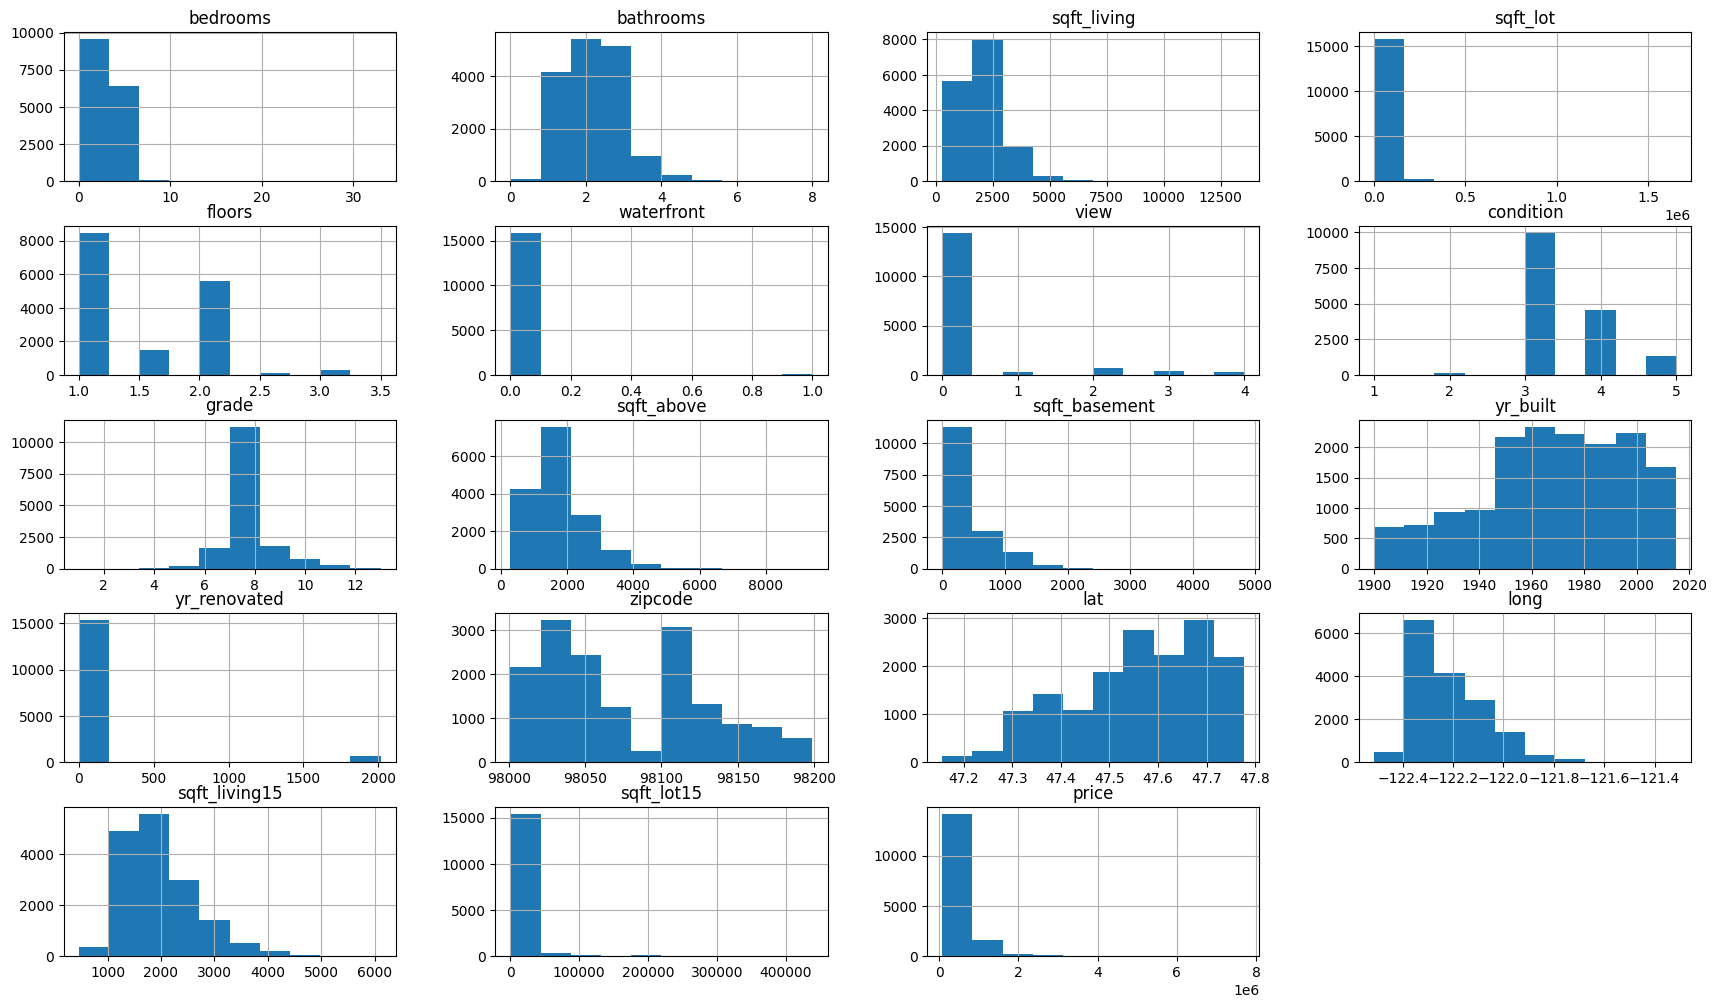

In [ ]:
train_data.hist(figsize=(21,12))

In [ ]:
train_data.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
bedrooms,1.000000,0.513508,0.567110,0.029232,0.200389,-0.007987,0.074427,0.033007,0.359331,0.461421,0.313939,0.161644,0.023459,-0.141411,0.003831,0.120056,0.380092,0.028492,0.306466
bathrooms,0.513508,1.000000,0.763312,0.082816,0.503131,0.070239,0.189964,-0.095153,0.663228,0.685478,0.306533,0.488997,0.068075,-0.202820,0.028730,0.222975,0.577443,0.083944,0.526452
sqft_living,0.567110,0.763312,1.000000,0.161281,0.390351,0.112442,0.284698,-0.044051,0.765818,0.869013,0.453845,0.321964,0.064012,-0.182344,0.064622,0.224190,0.752967,0.177716,0.702633
sqft_lot,0.029232,0.082816,0.161281,1.000000,0.006142,0.022737,0.065602,-0.013766,0.101142,0.176532,0.007685,0.069599,0.006566,-0.130294,-0.088815,0.225115,0.151695,0.682796,0.073894
floors,0.200389,0.503131,0.390351,0.006142,1.000000,0.029546,0.038338,-0.226467,0.465186,0.567349,-0.233685,0.436118,0.024504,-0.081207,0.040127,0.156863,0.318248,0.005371,0.276745
waterfront,-0.007987,0.070239,0.112442,0.022737,0.029546,1.000000,0.413235,0.010019,0.085187,0.076744,0.088797,-0.022512,0.101173,0.036630,-0.015925,-0.045616,0.087973,0.032922,0.272470
view,0.074427,0.189964,0.284698,0.065602,0.038338,0.413235,1.000000,0.046274,0.254702,0.166212,0.275435,-0.048217,0.104024,0.093082,0.008981,-0.088794,0.285401,0.063026,0.396083
condition,0.033007,-0.095153,-0.044051,-0.013766,-0.226467,0.010019,0.046274,1.000000,-0.122366,-0.145006,0.172211,-0.322611,-0.072991,0.000159,-0.018830,-0.106635,-0.085358,-0.009318,0.050078
grade,0.359331,0.663228,0.765818,0.101142,0.465186,0.085187,0.254702,-0.122366,1.000000,0.759409,0.178450,0.434826,0.024826,-0.185602,0.117128,0.198781,0.727409,0.117150,0.662872
sqft_above,0.461421,0.685478,0.869013,0.176532,0.567349,0.076744,0.166212,-0.145006,0.759409,1.000000,-0.046500,0.427141,0.031918,-0.246093,0.011337,0.334670,0.728527,0.195156,0.602346


<Axes: >

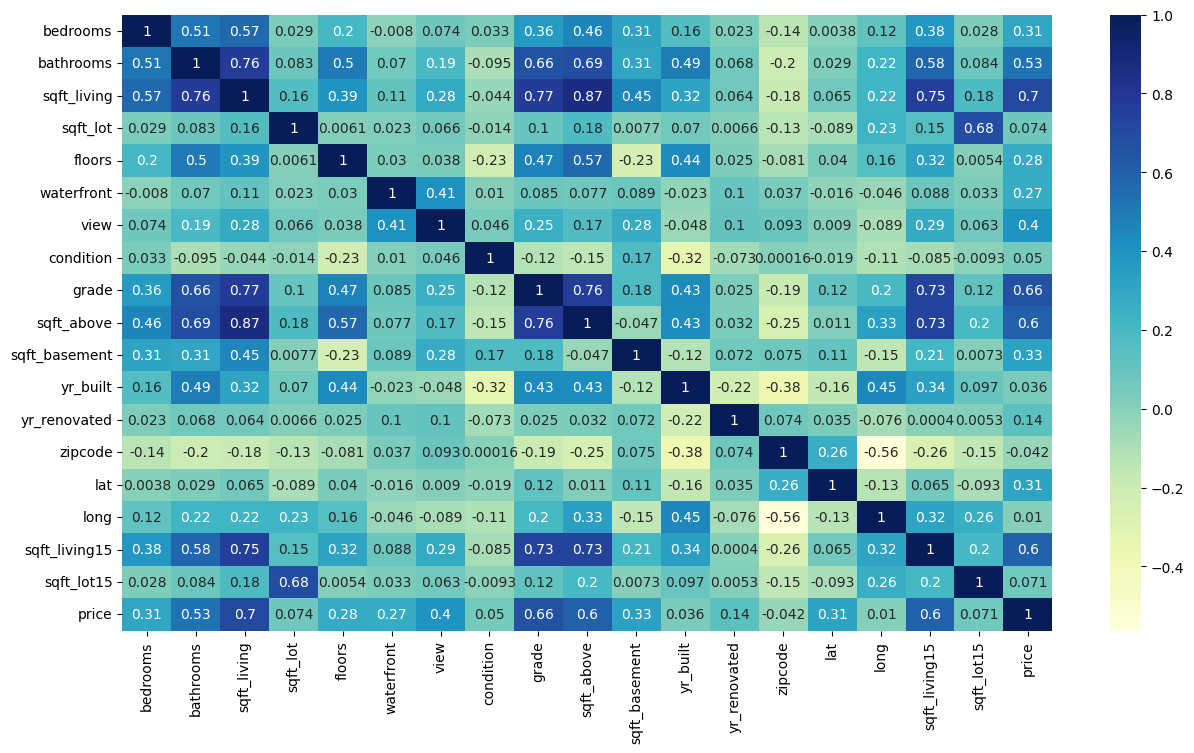

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True, cmap='YlGnBu')

In [ ]:
from sklearn.linear_model import LinearRegression

x_train,y_train= train_data.drop(['price'],axis=1),train_data['price']

reg= LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
test_data=x_test.join(y_test)

# test_data['bathrooms']=np.log(test_data['bathrooms']+1)
# test_data['sqft_living']=np.log(test_data['sqft_living']+1)
# test_data['grade']=np.log(test_data['grade']+1)
# test_data['sqft_above']=np.log(test_data['sqft_above']+1)
# test_data['sqft_living15']=np.log(test_data['sqft_living15']+1)

In [ ]:
test_data

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
14945,4,2.75,2400,12469,1.0,0,2,4,8,1760.0,640,1958,0,98008,47.5861,-122.112,2400,10400,839000.0
17702,3,1.50,2140,47743,1.5,0,0,3,9,2140.0,0,1978,0,98106,47.5402,-122.365,1060,6016,616750.0
11581,4,2.50,3200,6691,2.0,0,0,3,7,3200.0,0,2002,0,98038,47.3670,-122.031,2610,6510,422000.0
16083,3,1.75,1420,13187,1.0,0,0,4,7,1420.0,0,1974,0,98059,47.4608,-122.065,1620,13824,293000.0
9332,3,1.75,1010,9600,1.0,0,0,5,7,1010.0,0,1969,0,98042,47.3828,-122.090,1320,9600,230000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3220,3,1.00,1750,8820,1.0,0,0,4,7,1750.0,0,1961,0,98032,47.3608,-122.290,1400,9600,234000.0
19929,3,1.50,1270,1443,3.0,0,0,3,8,1270.0,0,2007,0,98115,47.6990,-122.317,1270,1413,440000.0
9297,5,2.50,3020,24750,1.0,0,0,3,8,1650.0,1370,1965,0,98005,47.5897,-122.179,2930,16062,449228.0
8403,3,1.00,1070,5750,1.0,0,0,3,7,1070.0,0,1952,0,98178,47.5071,-122.255,1420,6500,239300.0


In [ ]:
x_test,y_test= test_data.drop(['price'],axis=1),test_data['price']

In [ ]:
test_data

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
14945,4,2.75,2400,12469,1.0,0,2,4,8,1760.0,640,1958,0,98008,47.5861,-122.112,2400,10400,839000.0
17702,3,1.50,2140,47743,1.5,0,0,3,9,2140.0,0,1978,0,98106,47.5402,-122.365,1060,6016,616750.0
11581,4,2.50,3200,6691,2.0,0,0,3,7,3200.0,0,2002,0,98038,47.3670,-122.031,2610,6510,422000.0
16083,3,1.75,1420,13187,1.0,0,0,4,7,1420.0,0,1974,0,98059,47.4608,-122.065,1620,13824,293000.0
9332,3,1.75,1010,9600,1.0,0,0,5,7,1010.0,0,1969,0,98042,47.3828,-122.090,1320,9600,230000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3220,3,1.00,1750,8820,1.0,0,0,4,7,1750.0,0,1961,0,98032,47.3608,-122.290,1400,9600,234000.0
19929,3,1.50,1270,1443,3.0,0,0,3,8,1270.0,0,2007,0,98115,47.6990,-122.317,1270,1413,440000.0
9297,5,2.50,3020,24750,1.0,0,0,3,8,1650.0,1370,1965,0,98005,47.5897,-122.179,2930,16062,449228.0
8403,3,1.00,1070,5750,1.0,0,0,3,7,1070.0,0,1952,0,98178,47.5071,-122.255,1420,6500,239300.0


In [ ]:
reg.score(x_test,y_test)

0.698513540235608

In [ ]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(x_train,y_train)
y_pred = model_SVR.predict(x_test)

print(mean_absolute_percentage_error(y_test, y_pred))


0.4346404724078127


In [ ]:
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(x_train, y_train)
Y_pred = model_RFR.predict(x_test)

mean_absolute_percentage_error(y_test, Y_pred)


0.14028274417199418